In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/link2/nih_labels.csv")

In [3]:
df.head()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Cardiomegaly,Emphysema,Effusion,Hernia,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,fold
0,00000001_000.png,0,1,058Y,M,PA,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,00000001_001.png,1,1,058Y,M,PA,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,00000001_002.png,2,1,058Y,M,PA,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,00000002_000.png,0,2,081Y,M,PA,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,00000003_000.png,0,3,081Y,F,PA,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [4]:
df['Date'].dtype

dtype('O')

In [5]:
df['date_parsed'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df['date_parsed'].head()

0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
Name: date_parsed, dtype: datetime64[ns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3650 non-null   object        
 1   Temp         3650 non-null   float64       
 2   date_parsed  3650 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [7]:
monthwise = df['date_parsed'].dt.month
monthwise

0        1
1        1
2        1
3        1
4        1
        ..
3645    12
3646    12
3647    12
3648    12
3649    12
Name: date_parsed, Length: 3650, dtype: int64

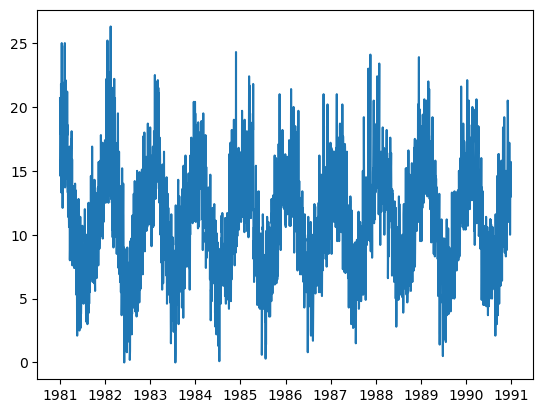

In [8]:
import matplotlib.pyplot as plt
plt.plot(df['date_parsed'],df['Temp'])

<Axes: xlabel='date_parsed', ylabel='Temp'>

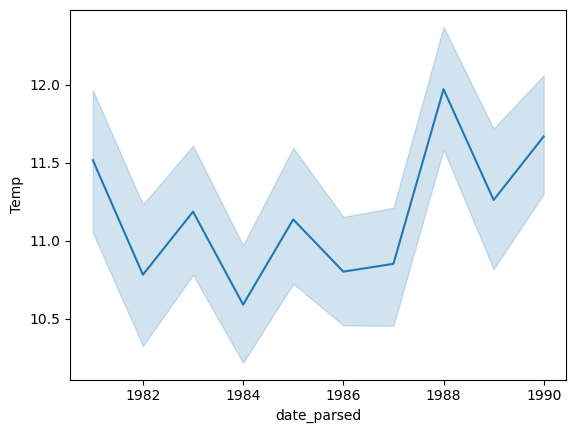

In [9]:
sns.lineplot(x = df['date_parsed'].dt.year,y = df['Temp'])

<Axes: xlabel='date_parsed', ylabel='Temp'>

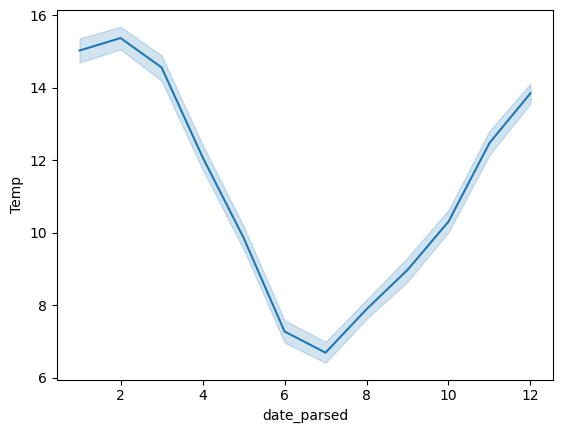

In [10]:
sns.lineplot(x = df['date_parsed'].dt.month,y = df['Temp'])

<Axes: xlabel='date_parsed', ylabel='Temp'>

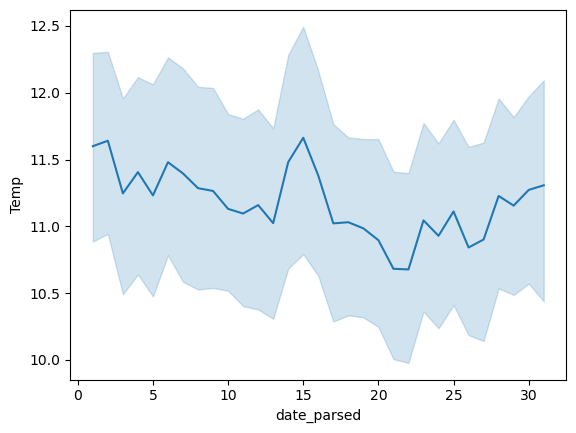

In [11]:
sns.lineplot(x = df['date_parsed'].dt.day,y = df['Temp'])

In [12]:
df.isnull().sum()

Date           0
Temp           0
date_parsed    0
dtype: int64

In [13]:
df

,Date,Temp,date_parsed
0,1981-01-01,20.7,1981-01-01
1,1981-01-02,17.9,1981-01-02
2,1981-01-03,18.8,1981-01-03
3,1981-01-04,14.6,1981-01-04
4,1981-01-05,15.8,1981-01-05
...,...,...,...
3645,1990-12-27,14.0,1990-12-27
3646,1990-12-28,13.6,1990-12-28
3647,1990-12-29,13.5,1990-12-29
3648,1990-12-30,15.7,1990-12-30


In [14]:
df['day'] = df.date_parsed.dt.day
df

,Date,Temp,date_parsed,day
0,1981-01-01,20.7,1981-01-01,1
1,1981-01-02,17.9,1981-01-02,2
2,1981-01-03,18.8,1981-01-03,3
3,1981-01-04,14.6,1981-01-04,4
4,1981-01-05,15.8,1981-01-05,5
...,...,...,...,...
3645,1990-12-27,14.0,1990-12-27,27
3646,1990-12-28,13.6,1990-12-28,28
3647,1990-12-29,13.5,1990-12-29,29
3648,1990-12-30,15.7,1990-12-30,30


In [15]:
df['month'] = df.date_parsed.dt.month
df['year'] = df.date_parsed.dt.year
df

,Date,Temp,date_parsed,day,month,year
0,1981-01-01,20.7,1981-01-01,1,1,1981
1,1981-01-02,17.9,1981-01-02,2,1,1981
2,1981-01-03,18.8,1981-01-03,3,1,1981
3,1981-01-04,14.6,1981-01-04,4,1,1981
4,1981-01-05,15.8,1981-01-05,5,1,1981
...,...,...,...,...,...,...
3645,1990-12-27,14.0,1990-12-27,27,12,1990
3646,1990-12-28,13.6,1990-12-28,28,12,1990
3647,1990-12-29,13.5,1990-12-29,29,12,1990
3648,1990-12-30,15.7,1990-12-30,30,12,1990


In [16]:
df_wod = df.drop(['Date','date_parsed'],axis =1)
df_wod

,Temp,day,month,year
0,20.7,1,1,1981
1,17.9,2,1,1981
2,18.8,3,1,1981
3,14.6,4,1,1981
4,15.8,5,1,1981
...,...,...,...,...
3645,14.0,27,12,1990
3646,13.6,28,12,1990
3647,13.5,29,12,1990
3648,15.7,30,12,1990


In [17]:
dummies_day = pd.get_dummies(df_wod.day,drop_first = True)
dummies_day

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
dummies_month = pd.get_dummies(df_wod.month,drop_first = True)
dummies_month.rename(columns ={2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace = True)
dummies_month

,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3645,0,0,0,0,0,0,0,0,0,0,1
3646,0,0,0,0,0,0,0,0,0,0,1
3647,0,0,0,0,0,0,0,0,0,0,1
3648,0,0,0,0,0,0,0,0,0,0,1


In [19]:
X = pd.concat([df_wod.year,dummies_month,dummies_day], axis = 1)

In [20]:
X

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,...,22,23,24,25,26,27,28,29,30,31
0,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3646,1990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3647,1990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3648,1990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
y = df_wod.iloc[:,0].values
y

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [22]:
y.reshape(-1,1)

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [23]:
X.corr()

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,...,22,23,24,25,26,27,28,29,30,31
year,1.000000e+00,0.000357,-1.959203e-14,-2.003026e-14,-1.974542e-14,-1.026897e-14,-4.783601e-15,4.943942e-16,9.571015e-15,2.168379e-14,...,1.137862e-15,1.858917e-15,1.972276e-15,1.951267e-15,1.525983e-15,1.502406e-15,1.155485e-15,0.000553,2.761777e-15,-0.000705
feb,3.572419e-04,1.000000,-8.815483e-02,-8.659179e-02,-8.815483e-02,-8.659179e-02,-8.815483e-02,-8.815483e-02,-8.659179e-02,-8.815483e-02,...,4.193659e-03,4.193659e-03,4.193659e-03,4.193659e-03,4.193659e-03,4.193659e-03,4.193659e-03,-0.039584,-5.100740e-02,-0.039869
mar,-1.959203e-14,-0.088155,1.000000e+00,-9.116872e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,0.002779,3.779716e-03,0.030705
apr,-2.003026e-14,-0.086592,-9.116872e-02,1.000000e+00,-9.116872e-02,-8.955224e-02,-9.116872e-02,-9.116872e-02,-8.955224e-02,-9.116872e-02,...,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,0.004595,5.594832e-03,-0.041232
may,-1.974542e-14,-0.088155,-9.281437e-02,-9.116872e-02,1.000000e+00,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,0.002779,3.779716e-03,0.030705
jun,-1.026897e-14,-0.086592,-9.116872e-02,-8.955224e-02,-9.116872e-02,1.000000e+00,-9.116872e-02,-9.116872e-02,-8.955224e-02,-9.116872e-02,...,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,0.004595,5.594832e-03,-0.041232
jul,-4.783601e-15,-0.088155,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.116872e-02,1.000000e+00,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,0.002779,3.779716e-03,0.030705
aug,4.943942e-16,-0.088155,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,1.000000e+00,-9.116872e-02,-9.281437e-02,...,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,0.002779,3.779716e-03,0.030705
sep,9.571015e-15,-0.086592,-9.116872e-02,-8.955224e-02,-9.116872e-02,-8.955224e-02,-9.116872e-02,-9.116872e-02,1.000000e+00,-9.116872e-02,...,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,7.663179e-04,0.004595,5.594832e-03,-0.041232
oct,2.168379e-14,-0.088155,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,1.000000e+00,...,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,-1.056978e-03,0.002779,3.779716e-03,0.030705


In [24]:
X.head()

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,...,22,23,24,25,26,27,28,29,30,31
0,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.isnull().sum()

year    0
feb     0
mar     0
apr     0
may     0
jun     0
jul     0
aug     0
sep     0
oct     0
nov     0
dec     0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()

In [27]:
X.columns = X.columns.astype(str)

In [28]:
y=y.reshape(-1,1)
y

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

LinearRegression()

In [30]:
import matplotlib.pyplot as plt

In [31]:
ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))).reshape(-1,1)

array([[15.17721246],
       [15.21804579],
       [14.82387913],
       ...,
       [14.35067397],
       [14.55033037],
       [14.31555655]])

In [32]:
X.year

0       1981
1       1981
2       1981
3       1981
4       1981
        ... 
3645    1990
3646    1990
3647    1990
3648    1990
3649    1990
Name: year, Length: 3650, dtype: int64

In [33]:
y.reshape(1,-1)

array([[20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ]])

<Axes: xlabel='year', ylabel='temp'>

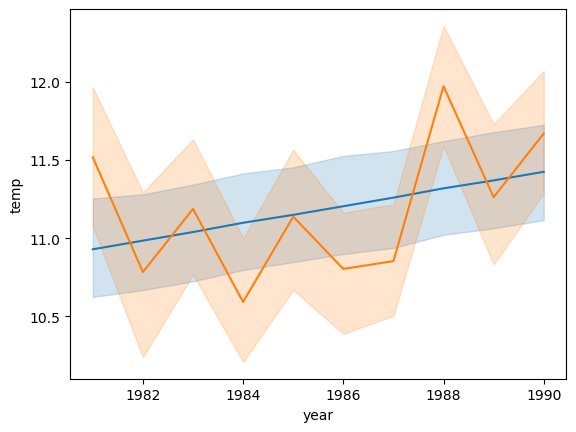

In [34]:
sns.lineplot(x=X['year'],y=pd.DataFrame(ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))),columns=['temp']).temp)
sns.lineplot(x=X['year'],y=pd.DataFrame(y,columns=['temp']).temp)

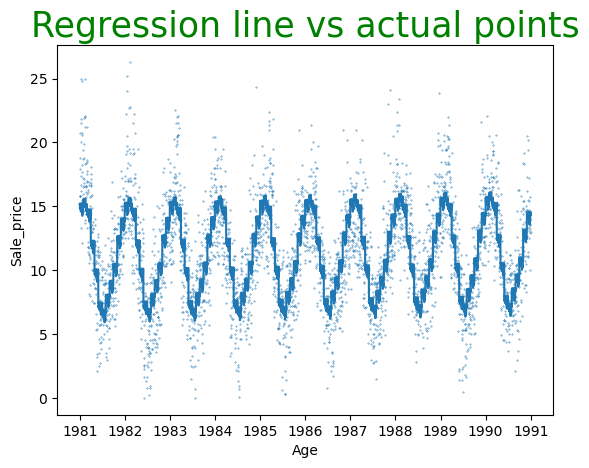

In [42]:
plt.title("Regression line vs actual points",fontsize = 25,color='green')
plt.ylabel("Sale_price")
plt.xlabel("Age")
plt.scatter(df['date_parsed'],pd.DataFrame(y,columns=['temp'])['temp'],s = 0.1,c = ['#1f77b4'])
plt.plot(df['date_parsed'],pd.DataFrame(ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X))),columns=['temp']).temp)

## Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(X)

polyreg = LinearRegression()
polyreg.fit(X_poly,y)

LinearRegression()

In [47]:
X.shape

(3650, 42)

Text(0.5, 1.0, '2nd degree')

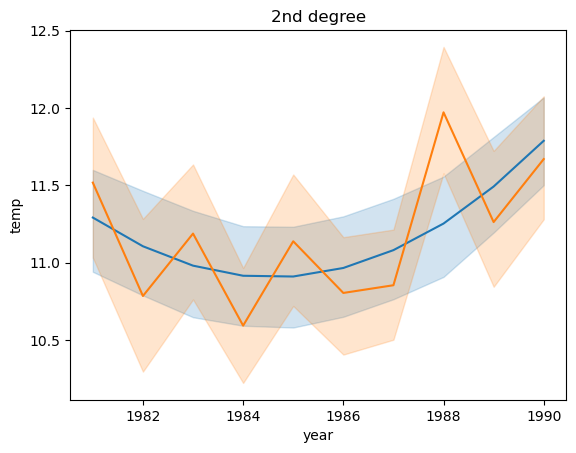

In [49]:
sns.lineplot(x=X['year'],y=pd.DataFrame(polyreg.predict(X_poly),columns=['temp']).temp)
sns.lineplot(x=X['year'],y=pd.DataFrame(y,columns=['temp']).temp)
plt.title("2nd degree")

In [56]:
poly3 = PolynomialFeatures(degree =3)
X_poly3 = poly3.fit_transform(X)
polyreg3 = LinearRegression()
polyreg3.fit(X_poly3,y)

LinearRegression()

Text(0.5, 1.0, '3rd degree')

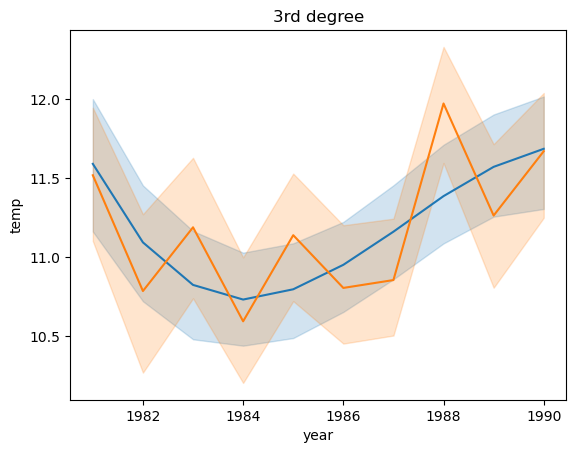

In [59]:
sns.lineplot(x=X['year'],y=pd.DataFrame(polyreg3.predict(X_poly3),columns=['temp']).temp)
sns.lineplot(x=X['year'],y=pd.DataFrame(y,columns=['temp']).temp)
plt.title("3rd degree")

## Support Vector Machines

In [60]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [61]:
svr.predict(ss_x.fit_transform(X))

array([1.36774989, 0.8608121 , 0.67140954, ..., 0.67034125, 0.86740194,
       0.8910427 ])

<Axes: xlabel='year', ylabel='temp'>

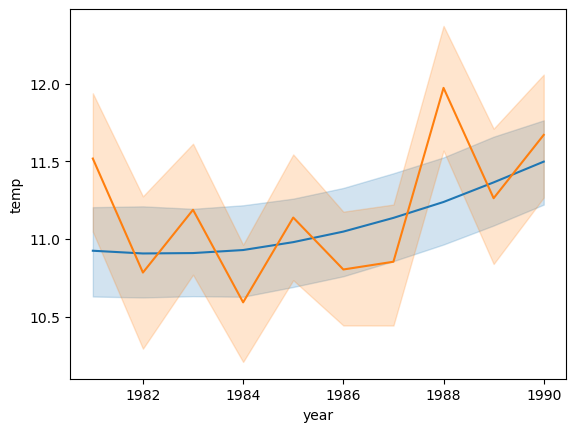

In [66]:
sns.lineplot(x=X['year'],y=pd.DataFrame(ss_y.inverse_transform(svr.predict(ss_x.fit_transform(X)).reshape(-1, 1)),columns=['temp']).temp)
sns.lineplot(x=X['year'],y=pd.DataFrame(y,columns=['temp']).temp)

## Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

DecisionTreeRegressor(random_state=0)

<Axes: xlabel='year', ylabel='temp'>

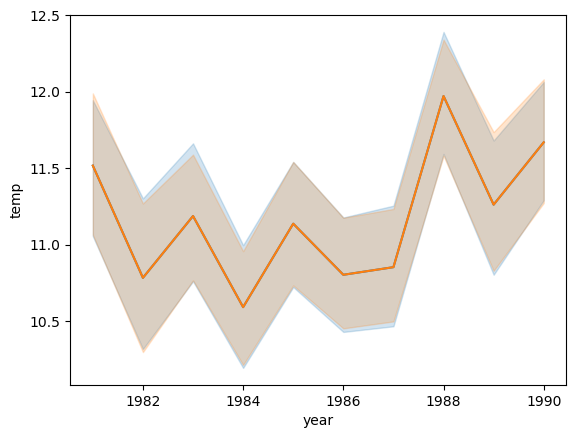

In [68]:
sns.lineplot(x=X['year'],y=pd.DataFrame(ss_y.inverse_transform(dtr.predict(ss_x.fit_transform(X)).reshape(-1, 1)),columns=['temp']).temp)
sns.lineplot(x=X['year'],y=pd.DataFrame(y,columns=['temp']).temp)

In [70]:
X_train.astype(str,)

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,...,22,23,24,25,26,27,28,29,30,31
1773,1985,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1499,1985,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1663,1985,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2070,1986,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3420,1990,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1983,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,1989,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,1985,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,1988,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [79]:
dtr1 = DecisionTreeRegressor(random_state = 0)
dtr1.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train.reshape(-1,1)))

DecisionTreeRegressor(random_state=0)

<Axes: xlabel='year', ylabel='temp'>

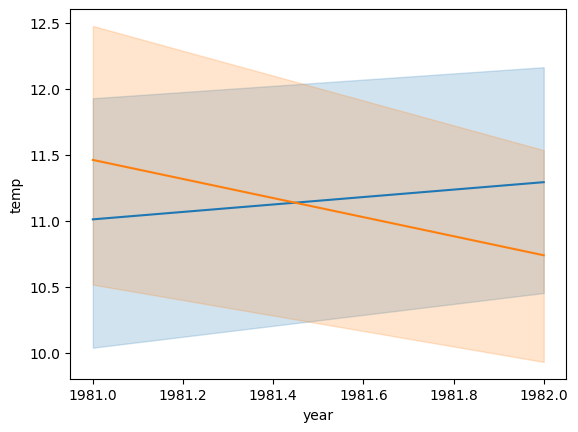

In [85]:
sns.lineplot(x=X_test['year'],y=pd.DataFrame(ss_y.inverse_transform(dtr1.predict(ss_x.fit_transform(X_test)).reshape(-1, 1)),columns=['temp']).temp)
sns.lineplot(x=X_test['year'],y=pd.DataFrame(y_test,columns=['temp']).temp)

## Lasso-Ridge Regressor

In [86]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 3)
ridgeR.fit(ss_x.fit_transform(X),ss_y.fit_transform(y))

Ridge(alpha=3)

<Axes: xlabel='year', ylabel='temp'>

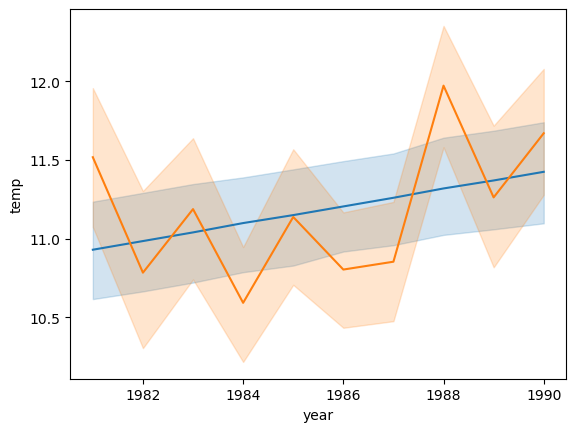

In [87]:
sns.lineplot(x=X['year'],y=pd.DataFrame(ss_y.inverse_transform(ridgeR.predict(ss_x.fit_transform(X)).reshape(-1, 1)),columns=['temp']).temp)
sns.lineplot(x=X['year'],y=pd.DataFrame(y,columns=['temp']).temp)